In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../src')


import methods
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import numpy as np
import betterspy

ERROR:root:Error during import of compiled filters!
ERROR:root:No module named 'png.pngfilters'
ERROR:root:Fallback to pure python mode!


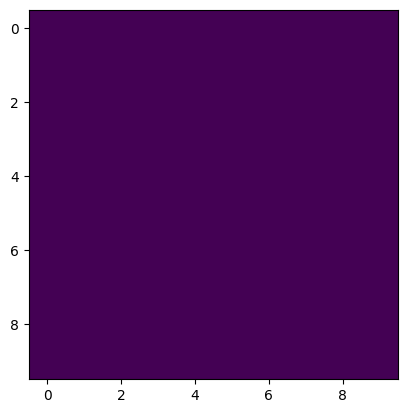

In [2]:
img_array, sh = methods.blank(n=10, noise=0)
# img_array, sh = methods.pd()

# -- mask?
mask_array = np.full(img_array.shape, False)
mask_array[:,5:] = True

# mask_array = np.full(img_array.shape, True)

# mask_array = img_array > 0

plt.imshow(img_array)
# plt.imshow(mask_array)

In [3]:
iG = methods.ImageGraph(img_array, mask_array=mask_array)

In [4]:
# plt.spy(nx.to_scipy_sparse_array(iG.G))

In [5]:
list(iG.G.nodes)[0]

51

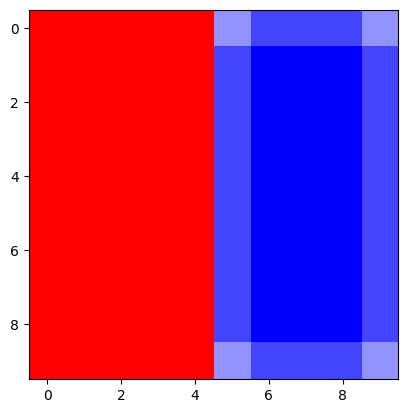

In [6]:
N = nx.normalized_laplacian_matrix(iG.G)
vals, vecs = scipy.sparse.linalg.eigs(N,which='SR')

plot_array = iG._node_vec_to_img_array(np.real(vecs[:,0]))

# re2 = np.transpose(np.real(vecs[:,0].reshape(sh[1],sh[0]))) # order?
# plt.imshow(re2, cmap='bwr')
plt.imshow(plot_array, cmap='bwr')